### How to Plot Raster data overlaid with a shapefile

In [3]:
import os
import xarray as xr
import rasterio as io
import geopandas as gpd
from rasterio.plot import show
import matplotlib.pylab as plt
import numpy as np
import spectral.io.envi as envi      
from rasterstats import zonal_stats
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
 
os.environ['PROJ_LIB'] = 'C:\\ProgramData\\Anaconda3\\envs\\radar\\Library\\share\\proj'
os.environ['GDAL_DATA'] = 'C:\\ProgramData\\Anaconda3\\envs\\radar\\Library\\share'

#### Plotting tiffs with shapefile
Plotting Frame 1

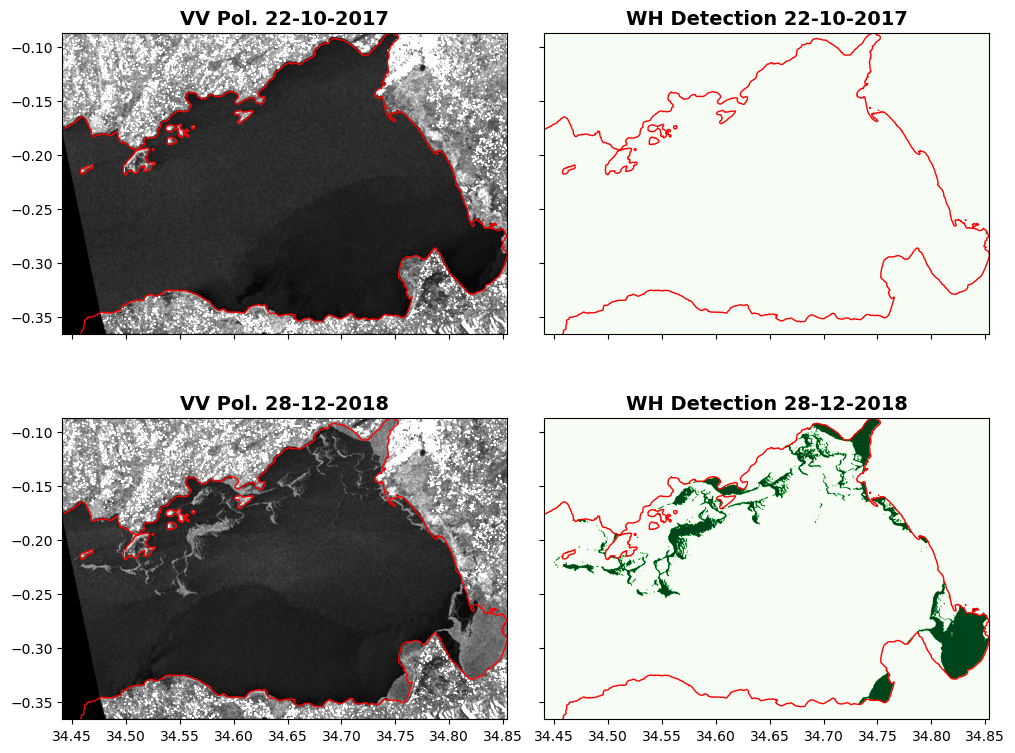

In [4]:
#Plot for Frame1
fact =2
lake = "D:\\WHH\\Lake_Victoria\\Lake_shapefile\\lake_victoria_2.shp"
shapefile = gpd.read_file(lake)
shapefile = shapefile.to_crs('EPSG:4326')
#read tif files
C11_VV1 = io.open(str('D:\\WHH\\Frame_1\\Coverts\\VV_tif\\20171022.tif'))
C11_VV2 = io.open(str('D:\\WHH\\Frame_1\\Coverts\\VV_tif\\20181228.tif'))
x =C11_VV1.read(1)
y =C11_VV2.read(1)
wh_det1 = io.open(str('D:\\WHH\\Frame_1\\Coverts\\trial\\20171022.tif'))
wh_det2 = io.open(str('D:\\WHH\\Frame_1\\Coverts\\trial\\20181228.tif'))

####
####
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 8), sharey=True,sharex=True)
fig.tight_layout()
# ax1.title('Axes values are scaled individually by default')
##plot shapefile
shapefile.plot(ax=ax1, facecolor='None', edgecolor='r')
shapefile.plot(ax=ax2, facecolor='None', edgecolor='r')
##plot rasters in tile 1 n 2
show(C11_VV1, ax=ax1, cmap = 'gray', vmin = 0,vmax = 2*np.nanmean(x) )
show(wh_det1, ax=ax2, cmap='Greens', transform=True )
###
ax1.set_title("VV Pol. 22-10-2017", fontsize=14,fontweight='bold')
ax3.set_title("VV Pol. 28-12-2018", fontsize=14, fontweight='bold')
ax1.xaxis.label.set_size(15)
ax2.xaxis.label.set_size(15)

## plot shapefile tile 3 and 4
shapefile.plot(ax=ax4, facecolor='None', edgecolor='r')
shapefile.plot(ax=ax3, facecolor='None', edgecolor='r')
## plot raster tile 3 and 4
show(C11_VV2, ax=ax3, cmap = 'gray', vmin = 0,vmax = 2*np.nanmean(y) )
show(wh_det2, ax=ax4, cmap='Greens',transform=True)
###
ax2.set_title("WH Detection 22-10-2017", fontsize=14,fontweight='bold')
ax4.set_title("WH Detection 28-12-2018", fontsize=14, fontweight='bold')
#ax1.ylabel( fontsize=16)
ax3.xaxis.label.set_size(14)
ax4.xaxis.label.set_size(14)
